1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9077 - loss: 0.3097 - val_accuracy: 0.9830 - val_loss: 0.0494
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9791 - loss: 0.0619
Test accuracy: 0.9829999804496765


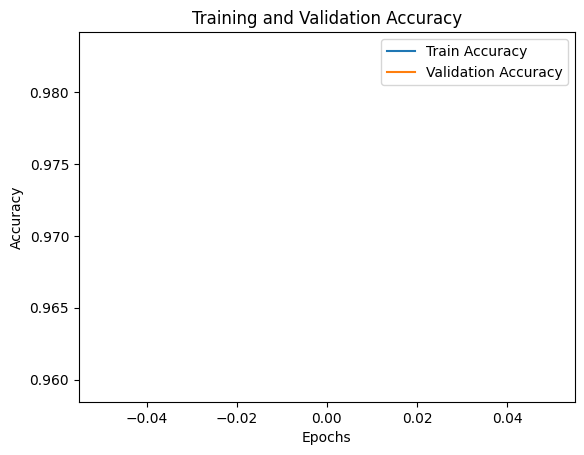

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape the images to be (28, 28, 1) and normalize to the range [0, 1]
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 2. Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# 3. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

# 5. Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# 6. Plot accuracy and validation accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Close the plot after displaying it to allow the program to continue
plt.close()


Enter an image number between 0 and 9999: 523


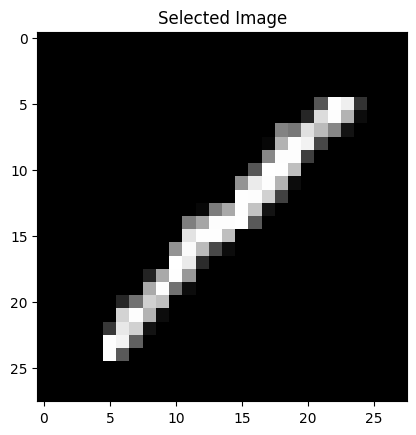

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted Digit: 1
Actual Digit: 1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 7. Take an image number as input from the user
img_number = int(input("Enter an image number between 0 and 9999: "))

# Ensure the input number is within range
if img_number < 0 or img_number >= len(test_images):  # test_images contains 10,000 images
    print("Please enter a number between 0 and 9999.")
else:
    # 8. Display the selected image
    plt.imshow(test_images[img_number].reshape(28, 28), cmap='gray')
    plt.title('Selected Image')
    plt.show()

    # Close the plot after displaying it
    plt.close()

    # 9. Reshape the image to match the input format of the model (since model expects 4D input)
    img = np.expand_dims(test_images[img_number], axis=0)  # Shape (1, 28, 28, 1)

    # 10. Predict the class of the image
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  # Get the class with the highest probability

    # 11. Get the actual class from the test labels
    actual_class = test_labels[img_number]

    # 12. Display the result
    print(f"Predicted Digit: {predicted_class}")
    print(f"Actual Digit: {actual_class}")
